## About Dataset
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

# Importing the relevat libiraries

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Get Data

In [52]:
# Load the data 
iris = pd.read_csv("Iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Checking For null values

In [53]:
iris.isnull().sum().any()

False

The *False* means that their is no null values in the dataset

### Drop The Id Column

In [54]:
# Drop Id col
iris.drop('Id',axis = 1 ,inplace = True)
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Summary Of the Numerical Attributes 

In [55]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

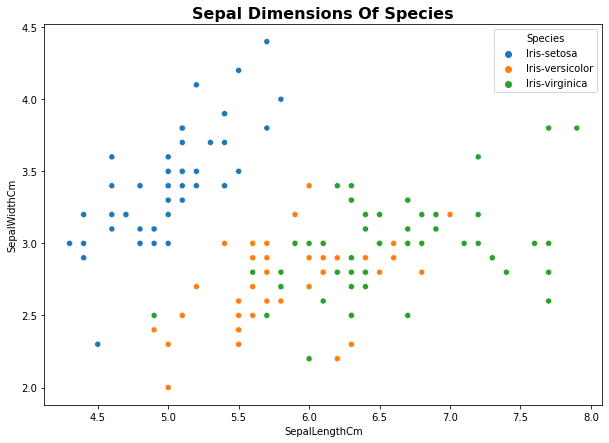

In [56]:
# First we will make a scatter plot to see the charactristics of sepal dimensions 
# Of the iris flowers
plt.figure(figsize=(10, 7))
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm",data=iris ,hue="Species")
plt.title("Sepal Dimensions Of Species", fontweight='bold', fontsize= 16)
plt.show()

As we can see here the Iris-setosa a short sepal length relative to the other two and relativly longer width, while the versicolor and verginica almost the same ratio between the length and width but the viginica has slightly higher ratio

### A quick box plot between all the features

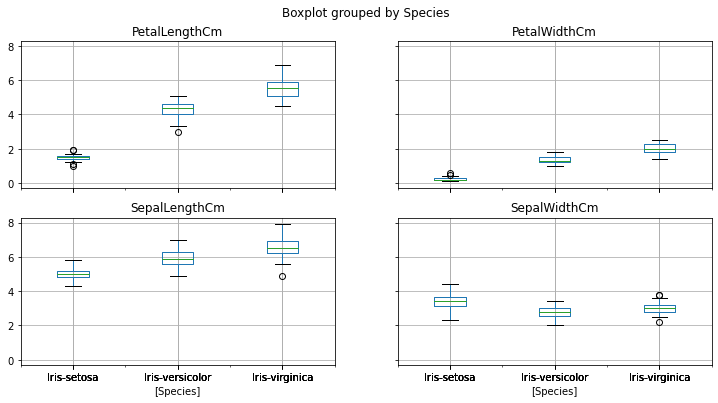

In [79]:
iris.boxplot(by="Species", figsize=(12, 6))
plt.show()

### let us look at an individual feature through a boxplot 

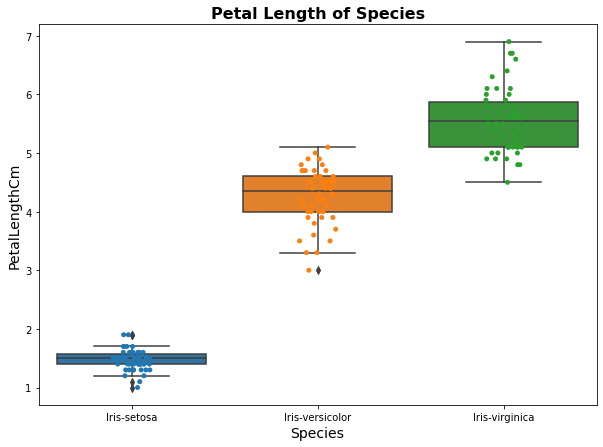

In [76]:
# Adjusting the figure size
plt.figure(figsize=(10, 7))

# Ploting petal to species
sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray")

# Labeling the axies
plt.xlabel("Species", fontsize=14)
plt.ylabel("PetalLengthCm", fontsize=14)
plt.title("Petal Length of Species", fontweight="bold", fontsize=16)

# Showing the plot
plt.show()

#### A more informative plot would be the violin plot

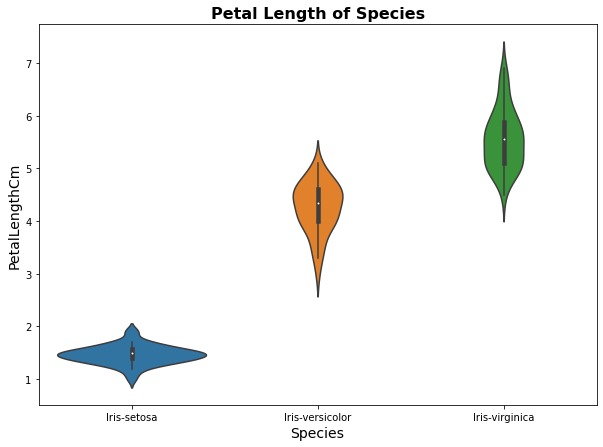

In [77]:
# Adjusting the figure size
plt.figure(figsize=(10, 7))

# Ploting petal to species
sns.violinplot(x="Species", y="PetalLengthCm", data=iris)

# Labeling the axies
plt.xlabel("Species", fontsize=14)
plt.ylabel("PetalLengthCm", fontsize=14)
plt.title("Petal Length of Species", fontweight="bold", fontsize=16)

# Showing the plot
plt.show()

As you can see the petal length also in the setosa plant is shorter the the other two plants but also most of the satosa length are *between 1 and 2 CM* with no one longer than 2cm.

<a id="3"></a>
## Correlation Between Variables

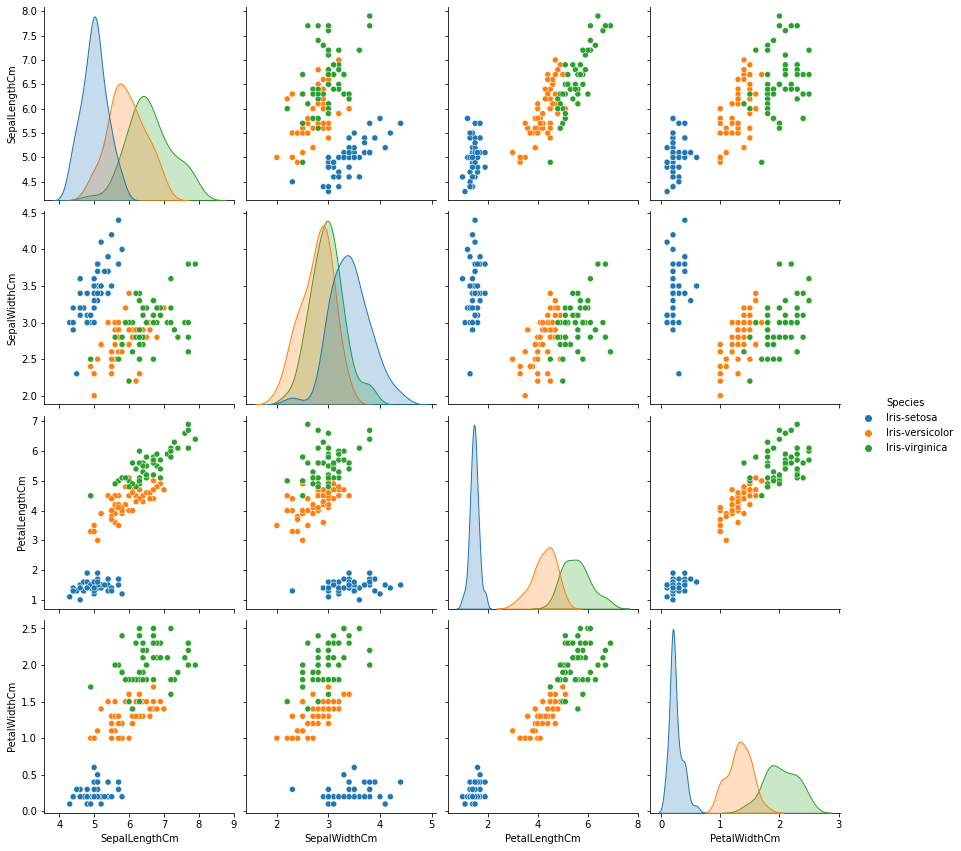

In [80]:
# Plots each numerical attribute against evry other numerical attribute
sns.pairplot(iris, hue="Species", height=3)
plt.show()

Almost in each we csn see high correlation espically with the "*Iris-setosa*"

In [81]:
# correlation between features
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


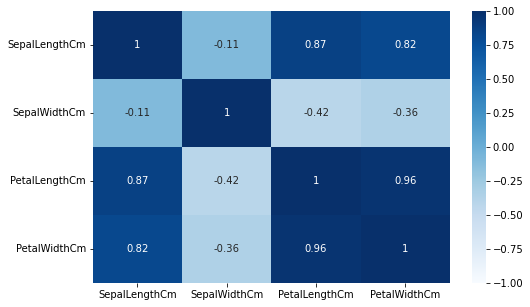

In [82]:
# Heatmap of the correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(iris.corr(), cmap="Blues", vmin=-1, annot=True)
plt.show()

We can see three features which have high correlation: *Sepal Length*, *Petal Length* and *Petal Width*.
Comparing correlation matrix to the boxplots, gives the following **results**:

Primarily, three boxplots have the same pattern. Distribution of the “*Iris-setosa*” is in the low end, “*Iris-versicolor*” is in the middle and “*Iris-virginica*” is in the high end. This confirms high correlation between three features as we observed in correlation matrix.

Secondly, *“Iris-setosa”* is easy to distinguish in *Petal Length* and *Petal Width* values.

# Data Preparation

In [83]:
from sklearn.model_selection import train_test_split

# Spliting the data into attributes (X) and labels (y).
X = iris.drop("Species", axis=1)
y = iris["Species"].copy()

# Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)


In [84]:
from sklearn import preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Encoding String labels into numbers
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Standardisation for better processing data
num_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

# ColumnTransform enables us to transform differant types of columns in one pipeline
full